<a href="https://colab.research.google.com/github/prannyv/luka-magic/blob/main/gameIndexingv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Verify that API keys are loaded
if not os.getenv("HF_TOKEN"):
    raise ValueError("HF_TOKEN not found in environment. Please check your .env file.")
if not os.getenv("ROBOFLOW_API_KEY"):
    raise ValueError("ROBOFLOW_API_KEY not found in environment. Please check your .env file.")

In [ ]:
# !nvidia-smi

Tue Dec 23 20:35:25 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P0             27W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
from pathlib import Path

HOME = Path.cwd()
print("HOME:", HOME)

HOME: /Users/pranav/Documents/git/luka-magic


In [6]:
!git clone https://github.com/Gy920/segment-anything-2-real-time.git
%cd {HOME}/segment-anything-2-real-time
!pip3 install -e . -q
!python3 setup.py build_ext --inplace

Cloning into 'segment-anything-2-real-time'...
remote: Enumerating objects: 406, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 406 (delta 65), reused 56 (delta 56), pack-reused 314 (from 2)
Receiving objects: 100% (406/406), 79.43 MiB | 43.17 MiB/s, done.
Resolving deltas: 100% (91/91), done.
/Users/pranav/Documents/git/luka-magic/segment-anything-2-real-time
  error: subprocess-exited-with-error
  
  × Getting requirements to build editable did not run successfully.
  │ exit code: 1
  ╰─> [35 lines of output]
      /private/var/folders/1n/hhjfh09x3gjc5ctppxd0j6300000gn/T/pip-build-env-oylwh8oc/overlay/lib/python3.13/site-packages/torch/_subclasses/functional_tensor.py:279: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:84.)
        cpu = _conversion_method_template(device=torch.device("cpu"))
      

In [ ]:
!(cd checkpoints && bash download_ckpts.sh)

--2025-12-23 20:41:09--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_tiny.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.35.37.123, 13.35.37.84, 13.35.37.90, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.35.37.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156008466 (149M) [application/vnd.snesdev-page-table]
Saving to: ‘sam2.1_hiera_tiny.pt.1’

sam2.1_hiera_tiny.p 100%[===================>] 148.78M   259MB/s    in 0.6s    

2025-12-23 20:41:10 (259 MB/s) - ‘sam2.1_hiera_tiny.pt.1’ saved [156008466/156008466]

--2025-12-23 20:41:10--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_small.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.35.37.123, 13.35.37.84, 13.35.37.90, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.35.37.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184416285 (176M) [applicat

In [ ]:
!pip install -q gdown
!pip install -q inference-gpu

!pip install supervision==0.27.0
!pip install -q git+https://github.com/roboflow/sports.git@feat/basketball

!pip install -q transformers num2words python-dotenv

  Preparing metadata (setup.py) ... done


In [ ]:
import os

os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

In [ ]:
SOURCE_VIDEO_DIRECTORY = HOME / "source"

!gdown -q https://drive.google.com/drive/folders/1eDJYqQ77Fytz15tKGdJCMeYSgmoQ-2-H -O {SOURCE_VIDEO_DIRECTORY} --folder
!ls -la {SOURCE_VIDEO_DIRECTORY}

total 78208
drwxr-xr-x 2 root root     4096 Dec 23 20:42 .
drwxr-xr-x 1 root root     4096 Dec 23 20:17 ..
-rw-r--r-- 1 root root  8297338 May 20  2025 boston-celtics-new-york-knicks-game-1-q1-01.54-01.48.mp4
-rw-r--r-- 1 root root  6596558 May 20  2025 boston-celtics-new-york-knicks-game-1-q1-03.16-03.11.mp4
-rw-r--r-- 1 root root 10443619 May 20  2025 boston-celtics-new-york-knicks-game-1-q1-04.28-04.20.mp4
-rw-r--r-- 1 root root  6156208 May 20  2025 boston-celtics-new-york-knicks-game-1-q1-04.44-04.39.mp4
-rw-r--r-- 1 root root  5251332 May 20  2025 boston-celtics-new-york-knicks-game-1-q1-05.13-05.09.mp4
-rw-r--r-- 1 root root  7956046 May 20  2025 boston-celtics-new-york-knicks-game-1-q1-06.00-05.54.mp4
-rw-r--r-- 1 root root  9276239 May 20  2025 boston-celtics-new-york-knicks-game-1-q1-07.41-07.34.mp4
-rw-r--r-- 1 root root  7319631 May 20  2025 boston-celtics-new-york-knicks-game-1-q2-08.09-08.03.mp4
-rw-r--r-- 1 root root  8770496 May 20  2025 boston-celtics-new-york-knicks-g

In [ ]:
# This cell now handles downloading a single video.
# To ensure this video is used throughout the notebook,
# please make sure to comment out or delete the following cells:
# 1. The cell that downloads the video folder (cell_id: yY2fvS-Q2dtO).
# 2. The cell that defines SOURCE_VIDEO_PATH from the downloaded folder (cell_id: FVFUrYTk2vce).

# Extract the file ID from the provided Google Drive link
FILE_ID = "1BZqbRMN1VkBfNJjWpIIhKoGLTII5KlBn"
VIDEO_FILENAME = "user_provided_single_video.mp4"

# Define the path for the single video. This will be the SOURCE_VIDEO_PATH for subsequent operations.
SOURCE_VIDEO_PATH = SOURCE_VIDEO_DIRECTORY / VIDEO_FILENAME

# Download the single video using its ID
!gdown --id {FILE_ID} -O {SOURCE_VIDEO_PATH}

print(f"Downloaded video to: {SOURCE_VIDEO_PATH}")
# Optionally, you can list the directory contents to confirm
!ls -la {SOURCE_VIDEO_DIRECTORY}

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1BZqbRMN1VkBfNJjWpIIhKoGLTII5KlBn
To: /content/source/user_provided_single_video.mp4
100% 5.22M/5.22M [00:00<00:00, 125MB/s]
Downloaded video to: /content/source/user_provided_single_video.mp4
total 78208
drwxr-xr-x 2 root root     4096 Dec 23 20:42 .
drwxr-xr-x 1 root root     4096 Dec 23 20:17 ..
-rw-r--r-- 1 root root  8297338 May 20  2025 boston-celtics-new-york-knicks-game-1-q1-01.54-01.48.mp4
-rw-r--r-- 1 root root  6596558 May 20  2025 boston-celtics-new-york-knicks-game-1-q1-03.16-03.11.mp4
-rw-r--r-- 1 root root 10443619 May 20  2025 boston-celtics-new-york-knicks-game-1-q1-04.28-04.20.mp4
-rw-r--r-- 1 root root  6156208 May 20  2025 boston-celtics-new-york-knicks-game-1-q1-04.44-04.39.mp4
-rw-r--r-- 1 root r

In [ ]:
# SOURCE_VIDEO_PATH = SOURCE_VIDEO_DIRECTORY / "boston-celtics-new-york-knicks-game-1-q1-04.28-04.20.mp4"

In [ ]:
TEAM_ROSTERS = {
  "New York Knicks": {
    "55": "Hukporti",
    "1": "Payne",
    "0": "Wright",
    "11": "Brunson",
    "3": "Hart",
    "32": "Towns",
    "44": "Shamet",
    "25": "Bridges",
    "2": "McBride",
    "23": "Robinson",
    "8": "Anunoby",
    "4": "Dadiet",
    "5": "Achiuwa",
    "13": "Kolek"
  },
  "Boston Celtics": {
    "42": "Horford",
    "55": "Scheierman",
    "9": "White",
    "20": "Davison",
    "7": "Brown",
    "0": "Tatum",
    "27": "Walsh",
    "4": "Holiday",
    "8": "Porzingis",
    "40": "Kornet",
    "88": "Queta",
    "11": "Pritchard",
    "30": "Hauser",
    "12": "Craig",
    "26": "Tillman"
  }
}

TEAM_COLORS = {
    "New York Knicks": "#006BB6",
    "Boston Celtics": "#007A33"
}

In [ ]:
from IPython.display import Video
from typing import Dict, List, Optional, Union, Iterable, Tuple
from operator import itemgetter

import cv2
import numpy as np
import torch
from tqdm import tqdm

import supervision as sv
from inference import get_model
from sports import (
    clean_paths,
    ConsecutiveValueTracker,
    TeamClassifier,
    MeasurementUnit,
    ViewTransformer
)
from sports.basketball import (
    CourtConfiguration,
    League,
    draw_court,
    draw_points_on_court,
    draw_paths_on_court,
    draw_made_and_miss_on_court,
    ShotEventTracker
)

ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM3 model. Install SAM3 dependencies and set CORE_MODEL_SAM3_ENABLED to True.
ModelDependencyMissing: Your `inference` configuration does not support Gaze Detection model. Use pip install 'inference[gaze]' to install missing requirements.To suppress this warning, set CORE_MODEL_GAZE_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support YoloWorld model. Use pip install 'inference[yolo-world]' to install missing requirements.To suppress this warning, set CORE_MODEL_YOLO_WORLD_ENABLED to False.


In [ ]:
PLAYER_DETECTION_MODEL_ID = "basketball-player-detection-3-ycjdo/4"
PLAYER_DETECTION_MODEL_CONFIDENCE = 0.4
PLAYER_DETECTION_MODEL_IOU_THRESHOLD = 0.9
PLAYER_DETECTION_MODEL = get_model(model_id=PLAYER_DETECTION_MODEL_ID, api_key=os.environ["ROBOFLOW_API_KEY"])

COLOR = sv.ColorPalette.from_hex([
    "#ffff00", "#ff9b00", "#ff66ff", "#3399ff", "#ff66b2", "#ff8080",
    "#b266ff", "#9999ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
])

Resolved model_id: basketball-player-detection-3-ycjdo/4, dataset_id: basketball-player-detection-3-ycjdo, version_id: 4


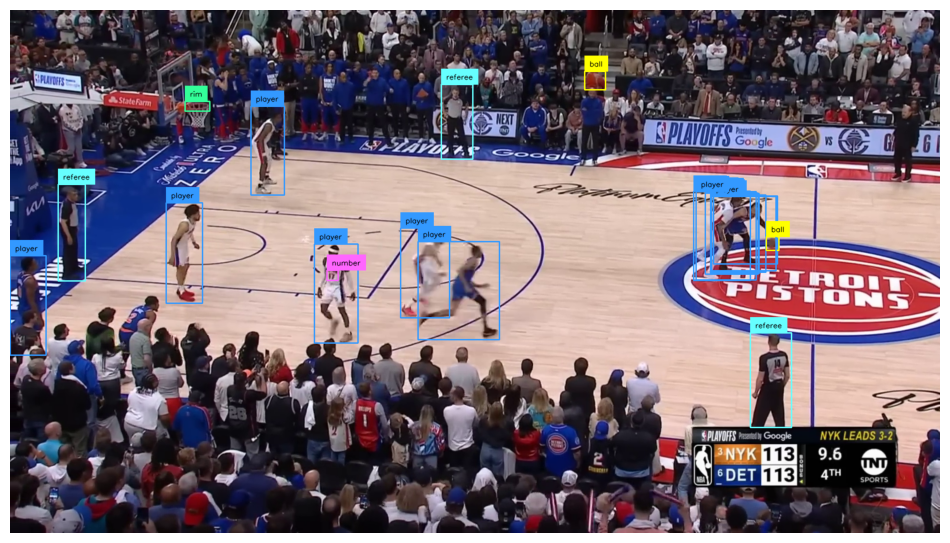

In [ ]:
box_annotator = sv.BoxAnnotator(color=COLOR, thickness=2)
label_annotator = sv.LabelAnnotator(color=COLOR, text_color=sv.Color.BLACK)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=PLAYER_DETECTION_MODEL_CONFIDENCE, iou_threshold=PLAYER_DETECTION_MODEL_IOU_THRESHOLD)[0]
detections = sv.Detections.from_inference(result)

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections)

sv.plot_image(annotated_frame)

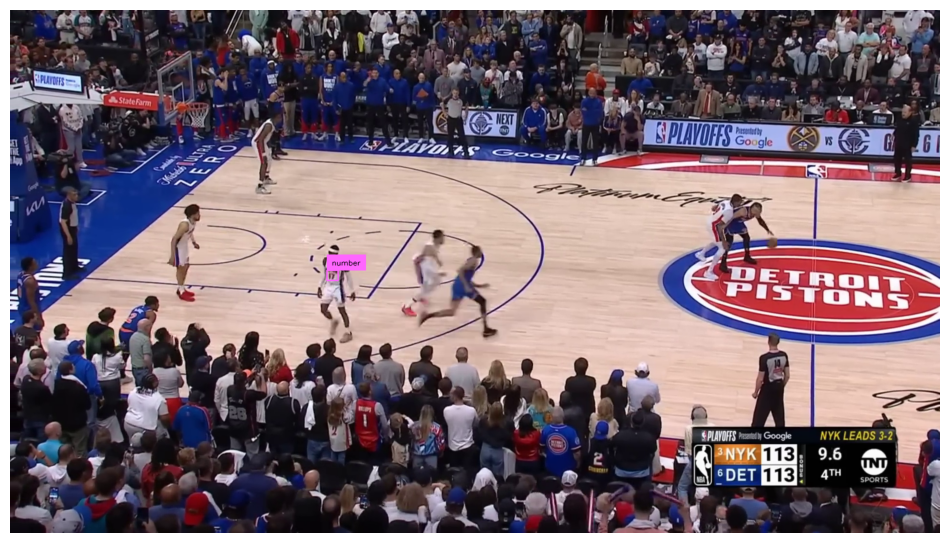

In [ ]:
NUMBER_CLASS_ID = 2

box_annotator = sv.BoxAnnotator(color=COLOR, thickness=2)
label_annotator = sv.LabelAnnotator(color=COLOR, text_color=sv.Color.BLACK)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=PLAYER_DETECTION_MODEL_CONFIDENCE, iou_threshold=PLAYER_DETECTION_MODEL_IOU_THRESHOLD)[0]
detections = sv.Detections.from_inference(result)
detections = detections[detections.class_id == NUMBER_CLASS_ID]

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections)

sv.plot_image(annotated_frame)

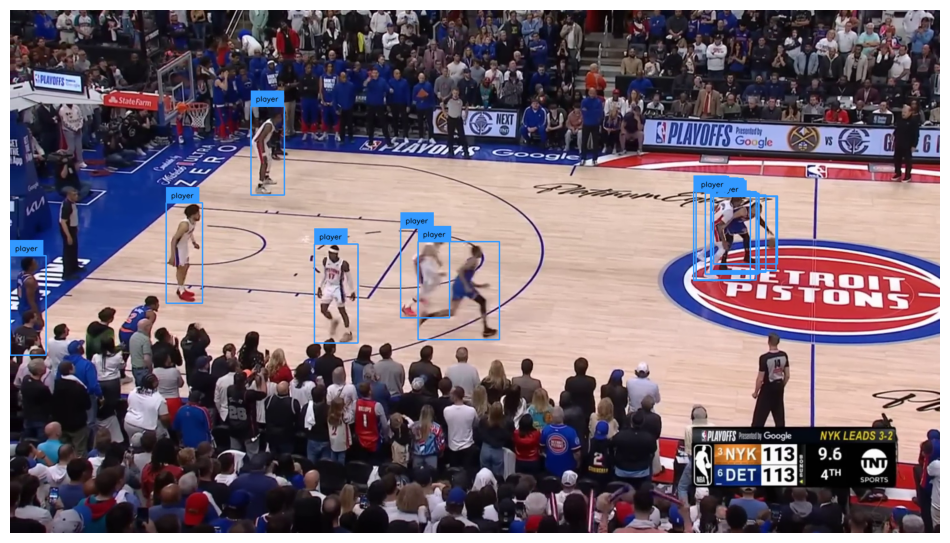

In [ ]:
PLAYER_CLASS_IDS = [3, 4, 5, 6, 7] # player, player-in-possession, player-jump-shot, player-layup-dunk, player-shot-block

box_annotator = sv.BoxAnnotator(color=COLOR, thickness=2)
label_annotator = sv.LabelAnnotator(color=COLOR, text_color=sv.Color.BLACK)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=PLAYER_DETECTION_MODEL_CONFIDENCE, iou_threshold=PLAYER_DETECTION_MODEL_IOU_THRESHOLD)[0]
detections = sv.Detections.from_inference(result)
detections = detections[np.isin(detections.class_id, PLAYER_CLASS_IDS)]

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections)

sv.plot_image(annotated_frame)

In [ ]:
TARGET_VIDEO_PATH = HOME / f"{SOURCE_VIDEO_PATH.stem}-detection{SOURCE_VIDEO_PATH.suffix}"
TARGET_VIDEO_COMPRESSED_PATH = HOME / f"{TARGET_VIDEO_PATH.stem}-detection{TARGET_VIDEO_PATH.suffix}"

box_annotator = sv.BoxAnnotator(color=COLOR, thickness=2)
label_annotator = sv.LabelAnnotator(color=COLOR, text_color=sv.Color.BLACK)

def callback(frame: np.ndarray, index: int) -> np.ndarray:
    result = PLAYER_DETECTION_MODEL.infer(frame, confidence=PLAYER_DETECTION_MODEL_CONFIDENCE, iou_threshold=PLAYER_DETECTION_MODEL_IOU_THRESHOLD)[0]
    detections = sv.Detections.from_inference(result)

    annotated_frame = frame.copy()
    annotated_frame = box_annotator.annotate(
        scene=annotated_frame,
        detections=detections)
    annotated_frame = label_annotator.annotate(
        scene=annotated_frame,
        detections=detections)
    return annotated_frame

sv.process_video(
    source_path=SOURCE_VIDEO_PATH,
    target_path=TARGET_VIDEO_PATH,
    callback=callback,
    show_progress=True
)

!ffmpeg -y -loglevel error -i {TARGET_VIDEO_PATH} -vcodec libx264 -crf 28 {TARGET_VIDEO_COMPRESSED_PATH}
Video(TARGET_VIDEO_COMPRESSED_PATH, embed=True, width=720)

Processing video:   0%|          | 0/287 [00:00<?, ?it/s]

In [ ]:
#load the model
%cd $HOME/segment-anything-2-real-time
!pip install sam2

from sam2.build_sam import build_sam2_camera_predictor

SAM2_CHECKPOINT = "checkpoints/sam2.1_hiera_large.pt"
SAM2_CONFIG = "configs/sam2.1/sam2.1_hiera_l.yaml"

predictor = build_sam2_camera_predictor(SAM2_CONFIG, SAM2_CHECKPOINT)

/content/segment-anything-2-real-time


In [ ]:
from __future__ import annotations

class SAM2Tracker:
    def __init__(self, predictor) -> None:
        self.predictor = predictor
        self._prompted = False

    def prompt_first_frame(self, frame: np.ndarray, detections: sv.Detections) -> None:
        if len(detections) == 0:
            raise ValueError("detections must contain at least one box")

        if detections.tracker_id is None:
            detections.tracker_id = list(range(1, len(detections) + 1))

        with torch.inference_mode(), torch.autocast("cuda", dtype=torch.bfloat16):
            self.predictor.load_first_frame(frame)
            for xyxy, obj_id in zip(detections.xyxy, detections.tracker_id):
                bbox = np.asarray([xyxy], dtype=np.float32)
                self.predictor.add_new_prompt(
                    frame_idx=0,
                    obj_id=int(obj_id),
                    bbox=bbox,
                )

        self._prompted = True

    def propagate(self, frame: np.ndarray) -> sv.Detections:
        if not self._prompted:
            raise RuntimeError("Call prompt_first_frame before propagate")

        with torch.inference_mode(), torch.autocast("cuda", dtype=torch.bfloat16):
            tracker_ids, mask_logits = self.predictor.track(frame)

        tracker_ids = np.asarray(tracker_ids, dtype=np.int32)
        masks = (mask_logits > 0.0).cpu().numpy()
        masks = np.squeeze(masks).astype(bool)

        if masks.ndim == 2:
            masks = masks[None, ...]

        masks = np.array([
            sv.filter_segments_by_distance(mask, relative_distance=0.03, mode="edge")
            for mask in masks
        ])

        xyxy = sv.mask_to_xyxy(masks=masks)
        detections = sv.Detections(xyxy=xyxy, mask=masks, tracker_id=tracker_ids)
        return detections

    def reset(self) -> None:
        self._prompted = False

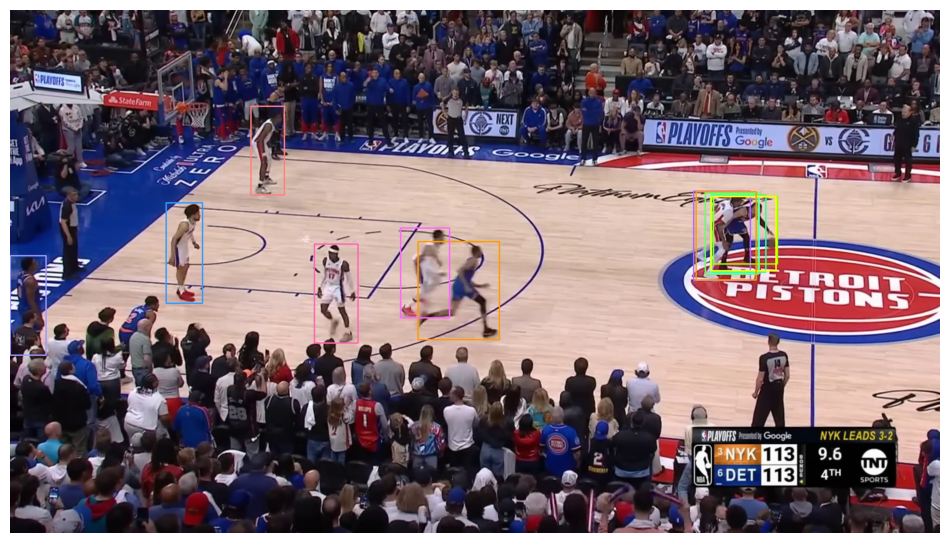

Processing video:   0%|          | 0/287 [00:00<?, ?it/s]

In [ ]:
TARGET_VIDEO_PATH = HOME / f"{SOURCE_VIDEO_PATH.stem}-mask{SOURCE_VIDEO_PATH.suffix}"
TARGET_VIDEO_COMPRESSED_PATH = HOME / f"{TARGET_VIDEO_PATH.stem}-compressed{TARGET_VIDEO_PATH.suffix}"

# define team annotators

mask_annotator = sv.MaskAnnotator(
    color=COLOR,
    color_lookup=sv.ColorLookup.TRACK,
    opacity=0.5)
box_annotator = sv.BoxAnnotator(
    color=COLOR,
    color_lookup=sv.ColorLookup.TRACK,
    thickness=2
)

# we use RF-DETR model to aquire future SAM2 prompt

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=PLAYER_DETECTION_MODEL_CONFIDENCE, iou_threshold=PLAYER_DETECTION_MODEL_IOU_THRESHOLD)[0]
detections = sv.Detections.from_inference(result)
detections = detections[np.isin(detections.class_id, PLAYER_CLASS_IDS)]
detections.tracker_id = np.arange(1, len(detections.class_id) + 1)

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(scene=annotated_frame, detections=detections)
sv.plot_image(annotated_frame)

# we prompt SAM2 using RF-DETR model detections

tracker = SAM2Tracker(predictor)
tracker.prompt_first_frame(frame, detections)

# we propagate tacks across all video frames

def callback(frame: np.ndarray, index: int) -> np.ndarray:
    detections = tracker.propagate(frame)
    annotated_frame = frame.copy()
    annotated_frame = mask_annotator.annotate(scene=annotated_frame, detections=detections)
    annotated_frame = box_annotator.annotate(scene=annotated_frame, detections=detections)
    return annotated_frame

sv.process_video(
    source_path=SOURCE_VIDEO_PATH,
    target_path=TARGET_VIDEO_PATH,
    callback=callback,
    show_progress=True
)

!ffmpeg -y -loglevel error -i {TARGET_VIDEO_PATH} -vcodec libx264 -crf 28 {TARGET_VIDEO_COMPRESSED_PATH}

In [ ]:
Video(TARGET_VIDEO_COMPRESSED_PATH, embed=True, width=720)

Testing using Roboflow SDK instead of interference SDK i think

In [ ]:
# # Install packages
# !pip install roboflow

# # Use this exact format
# from roboflow import Roboflow

# rf = Roboflow(api_key=os.environ["ROBOFLOW_API_KEY"])
# workspace = rf.workspace("roboflow-jvuqo")
# project = workspace.project("basketball-player-detection-3-ycjdo")
# model = project.version(2).model

In [ ]:
# SOURCE_IMAGE_DIRECTORY = HOME / "source_images"
# SOURCE_IMAGE_DIRECTORY.mkdir(parents=True, exist_ok=True)

# # Updated: Download image from the provided URL
# IMAGE_URL = "https://a.espncdn.com/combiner/i?img=/media/motion/wsc/2025/1220/979fd359-d16d-4f3c-ac89-bb2dc618dd82/979fd359-d16d-4f3c-ac89-bb2dc618dd82.jpg&w=1256"
# IMAGE_FILENAME = "espn_basketball.jpg"
# SOURCE_IMAGE_PATH = SOURCE_IMAGE_DIRECTORY / IMAGE_FILENAME

# !wget -q "$IMAGE_URL" -O {SOURCE_IMAGE_PATH}

# print(f"Image downloaded to: {SOURCE_IMAGE_PATH}")

# # Display the image to confirm
# from IPython.display import Image
# Image(filename=SOURCE_IMAGE_PATH)

In [ ]:
# result = model.predict("/content/source_images/espn_basketball.jpg")
# print(result)

In [ ]:
# import supervision as sv
# import cv2

# # Load the original image
# image = cv2.imread("/content/source_images/espn_basketball.jpg")

# # Convert the inference result to supervision Detections
# detections = sv.Detections.from_inference(result)

# # Create annotators
# box_annotator = sv.BoxAnnotator(thickness=2)
# label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

# # Annotate the image
# annotated_image = box_annotator.annotate(scene=image.copy(), detections=detections)
# annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# # Display the image
# sv.plot_image(annotated_image)